In [1]:
import pandas as pd

In [2]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
ratings = pd.read_csv('ratings.csv')
orders = pd.read_csv('orders.csv')

orders

,order_id,customer_id,product_id,order_date,quantity
0,1,66,38,2023-08-09 08:39:23.971834,4
1,2,10,29,2023-09-08 08:39:23.971834,4
2,3,58,9,2023-07-29 08:39:23.971834,3
3,4,33,44,2023-09-13 08:39:23.971834,4
4,5,32,47,2023-07-24 08:39:23.971834,2
...,...,...,...,...,...
995,996,30,42,2023-08-15 08:39:23.971834,4
996,997,3,16,2023-09-11 08:39:23.971834,2
997,998,84,29,2023-09-05 08:39:23.971834,2
998,999,77,43,2023-08-13 08:39:23.971834,4


In [3]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     1000 non-null   int64         
 1   customer_id  1000 non-null   int64         
 2   product_id   1000 non-null   int64         
 3   order_date   1000 non-null   datetime64[ns]
 4   quantity     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 39.2 KB


In [4]:
products

,product_id,product_name,price,category
0,1,Ektorp Sofa,694,Sofas & Armchairs
1,2,Poäng Armchair,569,Sofas & Armchairs
2,3,Klippan Loveseat,639,Sofas & Armchairs
3,4,Malm Bed Frame,202,Beds
4,5,Hemnes Daybed,845,Beds
5,6,Brimnes Bed Storage,773,Beds
6,7,Lack Side Table,717,Tables & Desks
7,8,Melltorp Dining Table,369,Tables & Desks
8,9,Micke Desk,19,Tables & Desks
9,10,Kallax Shelving Unit,733,Storage Solutions


In [5]:
ratings

,customer_id,product_id,rating
0,83,31,2
1,73,38,3
2,2,18,1
3,100,39,3
4,47,16,1
...,...,...,...
395,92,50,5
396,35,26,2
397,60,13,5
398,22,7,5


In [6]:
customers

,customer_id,name
0,1,Customer_1
1,2,Customer_2
2,3,Customer_3
3,4,Customer_4
4,5,Customer_5
...,...,...
95,96,Customer_96
96,97,Customer_97
97,98,Customer_98
98,99,Customer_99


In [7]:
merged_data = orders.merge(products , on = 'product_id').merge(customers, on = 'customer_id')
merged_data.head()

,order_id,customer_id,product_id,order_date,quantity,product_name,price,category,name
0,1,66,38,2023-08-09 08:39:23.971834,4,Bekant Conference Table,441,Tables & Desks,Customer_66
1,429,66,38,2023-09-10 08:39:23.971834,3,Bekant Conference Table,441,Tables & Desks,Customer_66
2,101,66,47,2023-08-26 08:39:23.971834,1,Nymö Lamp Shade,157,Lighting,Customer_66
3,563,66,26,2023-09-02 08:39:23.971834,2,Docksta Table,859,Tables & Desks,Customer_66
4,540,66,11,2023-08-18 08:39:23.971834,2,Billy Bookcase,287,Storage Solutions,Customer_66


In [8]:
product_performance = merged_data.groupby('product_name').agg(
    {
        'price':'sum', # the revenue for each product
        'quantity':'sum' # the quantity for each product sold
    }).reset_index()
product_performance

,product_name,price,quantity
0,Askvoll Wardrobe,3864,50
1,Bekant Conference Table,11907,62
2,Bernhard Chair,1280,36
3,Bestå TV Bench,18400,46
4,Billy Bookcase,5453,40
5,Brimnes Bed Storage,23190,77
6,Docksta Table,18039,54
7,Ektorp Sofa,14574,59
8,Fjälla Storage Box,18734,44
9,Fredde Desk,18854,46


In [9]:
top_product_revenue = product_performance.sort_values(by= 'price',ascending=False)
top_product_revenue

,product_name,price,quantity
5,Brimnes Bed Storage,23190,77
41,Småstad Wardrobe,20874,52
37,Råskog Stool,20520,59
9,Fredde Desk,18854,46
8,Fjälla Storage Box,18734,44
3,Bestå TV Bench,18400,46
27,Nockeby Sofa,18101,58
6,Docksta Table,18039,54
14,Ivar Cabinet,17862,55
12,Hemnes Daybed,16900,53


In [10]:
top_product_quantity = product_performance.sort_values(by= 'quantity',ascending=False)
top_product_quantity

,product_name,price,quantity
22,Mackapar Shoe Storage,15114,80
5,Brimnes Bed Storage,23190,77
31,Poäng Armchair,13656,63
45,Söderhamn Sofa Section,11691,63
1,Bekant Conference Table,11907,62
24,Melltorp Dining Table,10332,62
43,Strandmon Wing Chair,2050,61
49,Valje Wall Cabinet,16056,60
7,Ektorp Sofa,14574,59
37,Råskog Stool,20520,59


In [11]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      1000 non-null   int64         
 1   customer_id   1000 non-null   int64         
 2   product_id    1000 non-null   int64         
 3   order_date    1000 non-null   datetime64[ns]
 4   quantity      1000 non-null   int64         
 5   product_name  1000 non-null   object        
 6   price         1000 non-null   int64         
 7   category      1000 non-null   object        
 8   name          1000 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 78.1+ KB


In [12]:
# Orders that occured last month 
last_month = merged_data[merged_data['order_date'].dt.month == merged_data['order_date'].dt.month.max()]
last_month

,order_id,customer_id,product_id,order_date,quantity,product_name,price,category,name
1,429,66,38,2023-09-10 08:39:23.971834,3,Bekant Conference Table,441,Tables & Desks,Customer_66
3,563,66,26,2023-09-02 08:39:23.971834,2,Docksta Table,859,Tables & Desks,Customer_66
6,755,66,7,2023-09-01 08:39:23.971834,1,Lack Side Table,717,Tables & Desks,Customer_66
7,924,66,42,2023-09-14 08:39:23.971834,1,Småstad Wardrobe,994,Storage Solutions,Customer_66
10,76,78,38,2023-09-09 08:39:23.971834,4,Bekant Conference Table,441,Tables & Desks,Customer_78
...,...,...,...,...,...,...,...,...,...
987,346,93,6,2023-09-03 08:39:23.971834,2,Brimnes Bed Storage,773,Beds,Customer_93
989,654,83,3,2023-09-01 08:39:23.971834,4,Klippan Loveseat,639,Sofas & Armchairs,Customer_83
996,193,38,19,2023-09-15 08:39:23.971834,4,Ribba Frame,324,Decor,Customer_38
998,738,38,6,2023-09-08 08:39:23.971834,4,Brimnes Bed Storage,773,Beds,Customer_38


In [13]:
top_clients_last_month = last_month.groupby('name').agg(
    {'price':'sum'}).reset_index().sort_values(by='price',ascending= False)
top_clients_last_month

,name,price
0,Customer_1,5466
26,Customer_33,4476
38,Customer_44,4259
46,Customer_52,4236
71,Customer_76,3981
...,...,...
78,Customer_82,187
3,Customer_11,184
4,Customer_12,176
56,Customer_61,157


# RFM Analysis

In [14]:
import datetime as dt

# calculayte the latest order date
latest_date = merged_data['order_date'].max() + dt.timedelta(days=1)
latest_date

Timestamp('2023-09-18 08:39:23.971834')

In [15]:
# Calculate RFM values 

rfm = merged_data.groupby('customer_id').agg({
    'order_date': lambda x: (latest_date - x.max()).days,# Recency: days since last order
    'order_id': 'count', # frequency: number of order
    'price' : 'sum' # Monetary: total money spent
}).rename(columns={
    'order_date':'recency',
    'order_id':'frequency',
    'price':'monetary'
})

rfm

,recency,frequency,monetary
customer_id,,,
1,1,18,12106
2,3,9,4243
3,5,13,7395
4,4,22,10865
5,9,11,7175
...,...,...,...
96,3,9,4458
97,9,4,2678
98,7,7,3699


In [16]:
# Assign scores from 1 to 5 for each metric
rfm['recency_score'] = pd.qcut(rfm['recency'],5,labels=[5,4,3,2,1])
rfm['frequency_score'] = pd.qcut(rfm['frequency'],5,labels=[1,2,3,4,5])
rfm['monetary_score'] = pd.qcut(rfm['monetary'],5,labels=[1,2,3,4,5])# Higher score from lower

# Combine scores
rfm['rfm_score'] = rfm['recency_score'].astype('str') +rfm['frequency_score'].astype('str') +rfm['monetary_score'].astype('str')

rfm['rfm_score']

customer_id
1      555
2      422
3      345
4      455
5      234
      ... 
96     422
97     211
98     312
99     533
100    145
Name: rfm_score, Length: 100, dtype: object

In [17]:
rfm

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
customer_id,,,,,,,
1,1,18,12106,5,5,5,555
2,3,9,4243,4,2,2,422
3,5,13,7395,3,4,5,345
4,4,22,10865,4,5,5,455
5,9,11,7175,2,3,4,234
...,...,...,...,...,...,...,...
96,3,9,4458,4,2,2,422
97,9,4,2678,2,1,1,211
98,7,7,3699,3,1,2,312


In [18]:
rfm_sorted= rfm.sort_values(by=['rfm_score'],ascending=False)
rfm_sorted

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
customer_id,,,,,,,
1,1,18,12106,5,5,5,555
29,1,14,9225,5,5,5,555
52,1,16,8862,5,5,5,555
47,2,14,7385,5,5,5,555
33,2,15,8769,5,5,5,555
...,...,...,...,...,...,...,...
87,21,7,3502,1,1,1,111
79,16,3,2029,1,1,1,111
46,29,4,2488,1,1,1,111


# Review Analysis

In [19]:
ratings.head()

,customer_id,product_id,rating
0,83,31,2
1,73,38,3
2,2,18,1
3,100,39,3
4,47,16,1


In [20]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  400 non-null    int64
 1   product_id   400 non-null    int64
 2   rating       400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [21]:
top_reviewed_products = ratings.groupby('product_id').size().reset_index(name= 'num_reviews')
top_reviewed_products

,product_id,num_reviews
0,1,5
1,2,5
2,3,6
3,4,10
4,5,10
5,6,11
6,7,13
7,8,8
8,9,11
9,10,6


In [22]:
top_reviewed_products['num_reviews'].sum() # Just check the number of reviews

400

In [23]:
top_reviewed_products = top_reviewed_products.merge(products,on='product_id').sort_values(by='num_reviews',ascending=False)
top_reviewed_products

,product_id,num_reviews,product_name,price,category
11,12,16,Raskog Trolley,764,Storage Solutions
37,38,14,Bekant Conference Table,441,Tables & Desks
6,7,13,Lack Side Table,717,Tables & Desks
30,31,12,Nockeby Sofa,787,Sofas & Armchairs
44,45,11,Hektar Work Lamp,807,Lighting
31,32,11,Kivik Chaise,926,Sofas & Armchairs
27,28,11,Tarva Nightstand,547,Decor
26,27,11,Ivar Cabinet,687,Storage Solutions
16,17,11,Sinnerlig Pendant Lamp,610,Lighting
29,30,11,Strandmon Wing Chair,82,Chairs


In [24]:
avg_reviews_per_customer = ratings.groupby('customer_id').size()
avg_reviews_per_customer

customer_id
1      4
2      2
3      4
4      7
5      2
      ..
96     4
97     2
98     5
99     4
100    5
Length: 99, dtype: int64

In [25]:
product_reviews = ratings.groupby('product_id').agg({
    'rating':['count','mean']
})
product_reviews.columns = ['num_reviews','avg_rating']
product_reviews = product_reviews.reset_index().merge(products,on= 'product_id')
product_reviews

,product_id,num_reviews,avg_rating,product_name,price,category
0,1,5,2.800000,Ektorp Sofa,694,Sofas & Armchairs
1,2,5,3.000000,Poäng Armchair,569,Sofas & Armchairs
2,3,6,2.833333,Klippan Loveseat,639,Sofas & Armchairs
3,4,10,3.900000,Malm Bed Frame,202,Beds
4,5,10,2.500000,Hemnes Daybed,845,Beds
5,6,11,3.636364,Brimnes Bed Storage,773,Beds
6,7,13,3.000000,Lack Side Table,717,Tables & Desks
7,8,8,2.750000,Melltorp Dining Table,369,Tables & Desks
8,9,11,2.818182,Micke Desk,19,Tables & Desks
9,10,6,3.166667,Kallax Shelving Unit,733,Storage Solutions


In [26]:
top_reviewed_with_avg_rating = product_reviews.sort_values(by='avg_rating',ascending= False)
top_reviewed_with_avg_rating.head()

,product_id,num_reviews,avg_rating,product_name,price,category
24,25,2,4.500000,Rens Sheepskin Rug,610,Decor
19,20,6,4.166667,Pjatteryd Picture,715,Decor
3,4,10,3.900000,Malm Bed Frame,202,Beds
43,44,7,3.857143,Koppang Dresser,765,Decor
21,22,5,3.800000,Nordli Chest Drawers,561,Decor


In [27]:
top_reviewed_with_avg_rating.tail()

,product_id,num_reviews,avg_rating,product_name,price,category
4,5,10,2.5000,Hemnes Daybed,845,Beds
35,36,4,2.5000,Gronlid Armchair,719,Decor
11,12,16,2.3125,Raskog Trolley,764,Storage Solutions
17,18,10,2.3000,Skurup Ceiling Lamp,406,Lighting
39,40,8,1.7500,Lommarp Bookcase,860,Storage Solutions


In [28]:
total_spent = merged_data.groupby('customer_id').apply(lambda x :(x['quantity']*x['price']).sum()).reset_index(name= 'total_spent')
total_spent

,customer_id,total_spent
0,1,27081
1,2,9347
2,3,18077
3,4,25717
4,5,14913
...,...,...
95,96,12264
96,97,6088
97,98,8915
98,99,13181


In [29]:
# Calculate last purchase date for each customer
last_purchase = merged_data.groupby('customer_id')['order_date'].max().reset_index(name='last_purchase')
last_purchase

,customer_id,last_purchase
0,1,2023-09-17 08:39:23.971834
1,2,2023-09-15 08:39:23.971834
2,3,2023-09-13 08:39:23.971834
3,4,2023-09-14 08:39:23.971834
4,5,2023-09-09 08:39:23.971834
...,...,...
95,96,2023-09-15 08:39:23.971834
96,97,2023-09-09 08:39:23.971834
97,98,2023-09-11 08:39:23.971834
98,99,2023-09-17 08:39:23.971834


In [30]:
# Calculate number of reviews left by each customer
num_reviews = ratings.groupby('customer_id').size().reset_index(name= 'num_reviews')
num_reviews

,customer_id,num_reviews
0,1,4
1,2,2
2,3,4
3,4,7
4,5,2
...,...,...
94,96,4
95,97,2
96,98,5
97,99,4


In [31]:
customers_updated = customers.merge(total_spent , on= 'customer_id', how= 'left').merge(last_purchase,on= 'customer_id', how= 'left').merge(num_reviews,on= 'customer_id', how= 'left')
customers_updated

,customer_id,name,total_spent,last_purchase,num_reviews
0,1,Customer_1,27081,2023-09-17 08:39:23.971834,4.0
1,2,Customer_2,9347,2023-09-15 08:39:23.971834,2.0
2,3,Customer_3,18077,2023-09-13 08:39:23.971834,4.0
3,4,Customer_4,25717,2023-09-14 08:39:23.971834,7.0
4,5,Customer_5,14913,2023-09-09 08:39:23.971834,2.0
...,...,...,...,...,...
95,96,Customer_96,12264,2023-09-15 08:39:23.971834,4.0
96,97,Customer_97,6088,2023-09-09 08:39:23.971834,2.0
97,98,Customer_98,8915,2023-09-11 08:39:23.971834,5.0
98,99,Customer_99,13181,2023-09-17 08:39:23.971834,4.0


In [32]:
customers_updated.isnull().sum()

customer_id      0
name             0
total_spent      0
last_purchase    0
num_reviews      1
dtype: int64

In [33]:
customers_updated['num_reviews'].fillna(0,inplace=True)

In [34]:
customers_updated.isnull().sum()

customer_id      0
name             0
total_spent      0
last_purchase    0
num_reviews      0
dtype: int64

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

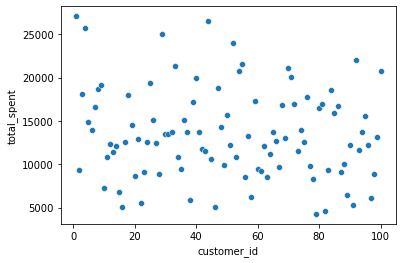

In [36]:
sns.scatterplot(data= customers_updated, x='customer_id', y= 'total_spent')
plt.show()

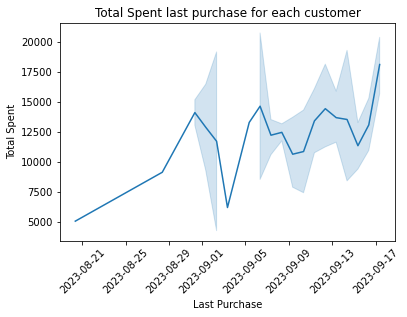

In [37]:
sns.lineplot(data= customers_updated, x='last_purchase', y= 'total_spent')
plt.xticks(rotation= 45)
plt.title('Total Spent last purchase for each customer')
plt.xlabel('Last Purchase')
plt.ylabel('Total Spent')
plt.show()

In [38]:
customers_updated.sort_values(by='total_spent',ascending= False)

,customer_id,name,total_spent,last_purchase,num_reviews
0,1,Customer_1,27081,2023-09-17 08:39:23.971834,4.0
43,44,Customer_44,26529,2023-09-14 08:39:23.971834,9.0
3,4,Customer_4,25717,2023-09-14 08:39:23.971834,7.0
28,29,Customer_29,24997,2023-09-17 08:39:23.971834,5.0
51,52,Customer_52,24055,2023-09-17 08:39:23.971834,3.0
...,...,...,...,...,...
90,91,Customer_91,5291,2023-09-14 08:39:23.971834,3.0
15,16,Customer_16,5118,2023-09-10 08:39:23.971834,2.0
45,46,Customer_46,5054,2023-08-20 08:39:23.971834,5.0
81,82,Customer_82,4569,2023-09-17 08:39:23.971834,9.0


In [39]:
customers_updated.sort_values(by='num_reviews',ascending= False)

,customer_id,name,total_spent,last_purchase,num_reviews
43,44,Customer_44,26529,2023-09-14 08:39:23.971834,9.0
74,75,Customer_75,12536,2023-09-07 08:39:23.971834,9.0
81,82,Customer_82,4569,2023-09-17 08:39:23.971834,9.0
91,92,Customer_92,22082,2023-09-12 08:39:23.971834,8.0
11,12,Customer_12,12396,2023-09-10 08:39:23.971834,8.0
...,...,...,...,...,...
18,19,Customer_19,14541,2023-09-17 08:39:23.971834,1.0
70,71,Customer_71,20065,2023-09-11 08:39:23.971834,1.0
66,67,Customer_67,9738,2023-09-12 08:39:23.971834,1.0
40,41,Customer_41,13682,2023-09-13 08:39:23.971834,1.0
